# # K-Nearest Neighbors (K-NN)

# PREDIKSI LEVEL STRES PENGGUNA

##### source dataset: https://www.kaggle.com/datasets/mahdimashayekhi/social-media-vs-productivity

##### Import Libary

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Import Dataset

In [16]:
dataset = pd.read_csv('social_media_vs_productivity.csv')
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 9].values

In [17]:
X

array([[56, 'Male'],
       [46, 'Male'],
       [32, 'Male'],
       ...,
       [42, 'Male'],
       [20, 'Female'],
       [44, 'Male']], shape=(30000, 2), dtype=object)

### Splitting the dataset into the Training set and Test set 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
X_train

array([[55, 'Male'],
       [62, 'Male'],
       [35, 'Male'],
       ...,
       [40, 'Female'],
       [45, 'Male'],
       [51, 'Male']], shape=(22500, 2), dtype=object)

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

##### Encode kolom gender dari string ke numerik

In [36]:
le = LabelEncoder()
X_train[:, 1] = le.fit_transform(X_train[:, 1])
X_test[:, 1] = le.transform(X_test[:, 1])

##### Konversi semua data ke tipe float


In [37]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train

array([[ 0.98094955,  0.77013867],
       [ 1.48810741,  0.77013867],
       [-0.46807289,  0.77013867],
       ...,
       [-0.10581728, -0.98674261],
       [ 0.25643833,  0.77013867],
       [ 0.69114506,  0.77013867]], shape=(22500, 2))

# Training the K-NN model on the Training set

In [41]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1)

# Predicting the Test set results

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
print(y_pred)
print(y_test)

[1 1 0 ... 1 0 2]
[6 9 2 ... 5 0 3]


# Making the Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[144 157 114  39  64  65  18  23  21  28  10]
 [145 206 121  55  51  63  18  11  17  17  18]
 [152 175 114  47  52  76  21  14   8  28  11]
 [136 176 104  43  60  77  26  25  17  29  20]
 [142 195 106  54  47  52  24   7  11  30  29]
 [149 180  94  58  46  51  28   4  12  36  23]
 [135 197 101  43  63  47  29  11  10  28  23]
 [127 198 101  54  55  76  25   9  11  30  23]
 [164 161 107  49  43  68  24  16  16  29  17]
 [134 178 101  56  66  68  17  11  24  22  22]
 [ 92 137  73  45  46  55  18  10   9  18  14]]


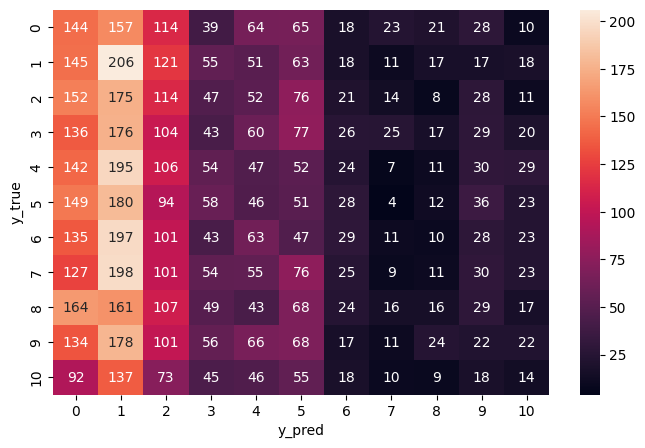

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [46]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.21      0.13       683
           1       0.11      0.29      0.15       722
           2       0.10      0.16      0.12       698
           3       0.08      0.06      0.07       713
           4       0.08      0.07      0.07       697
           5       0.07      0.07      0.07       681
           6       0.12      0.04      0.06       687
           7       0.06      0.01      0.02       709
           8       0.10      0.02      0.04       694
           9       0.07      0.03      0.04       699
          10       0.07      0.03      0.04       517

    accuracy                           0.09      7500
   macro avg       0.09      0.09      0.08      7500
weighted avg       0.09      0.09      0.08      7500



# Visualising the Training set results

# Visualising the Test set results

C:\Users\RESTU ARDIANSYAH\AppData\Local\Temp\ipykernel_23212\1225581693.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


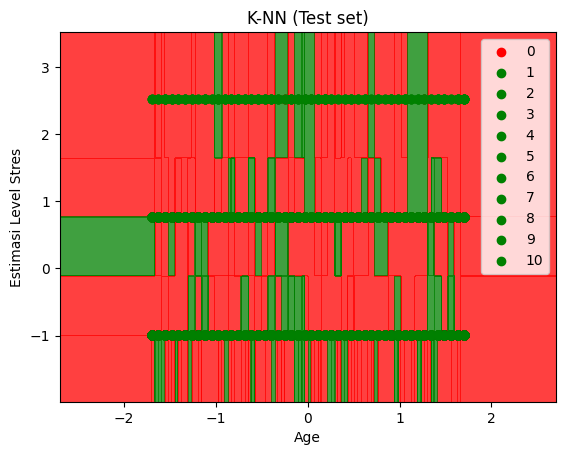

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimasi Level Stres')
plt.legend()
plt.show()